# **FGV EESP**

- ## Análise de Estacionariedade - Expectativa de Inflação
---



### **Bibliotecas**

In [ ]:
# Testes de raiz unitária
install.packages("urca")

In [ ]:
library(dplyr)
library(ggplot2)
library(httr)
library(lubridate)
library(readxl)
library(urca)
library(tidyverse)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/inflation-expectation/raw/main/data/public_data.xlsx"

# Download do arquivo
download.file(file_path, "public_data.xlsx")

# Ler o arquivo Excel e converter em dataframe
df_public_data <- as.data.frame(read_excel("public_data.xlsx"))

# Converter year e month_name
df_public_data <- df_public_data %>%
  mutate(year = as.numeric(year),  # Converter year para numérico
         month_name = factor(month_name, levels = month.abb, ordered = TRUE))  # Converter month_name para um fator ordenado

# Converter month_date
df_public_data$month_date <- ymd(df_public_data$month_date)  # Converter month_date para formato Date

# Lista de variáveis para transformar em séries temporais
vars_to_convert <- c("month", "market_inflation_expectation", "consumer_inflation_expectation", "consumer_confidence_index", "inflation_target", "inflation_target_lower_bound", "inflation_target_upper_bound", "inflation_target_wtd_avg", "inflation_target_lower_bound_wtd_avg", "inflation_target_upper_bound_wtd_avg", "ipca", "selic", "selic_deflated", "real_household_income", "real_household_income_trend", "real_household_income_gap", "real_exchange_rate", "real_exchange_rate_trend", "real_exchange_rate_gap", "gdp", "primary_fiscal_result", "primary_fiscal_result_to_gdp", "ipca_lag", "selic_deflated_lag", "primary_fiscal_result_to_gdp_lag", "real_exchange_rate_gap_lag", "real_household_income_gap_lag", "consumer_confidence_index_lag")

# Loop para transformar as variáveis em séries temporais
for (var in vars_to_convert) {
  df_public_data[[var]] <- ts(df_public_data[[var]], start = c(2006, 1), frequency = 12)
}

In [4]:
head(df_public_data, 5)

,year,month_name,month_date,month,market_inflation_expectation,consumer_inflation_expectation,consumer_confidence_index,inflation_target,inflation_target_lower_bound,inflation_target_upper_bound,⋯,real_exchange_rate_gap,gdp,primary_fiscal_result,primary_fiscal_result_to_gdp,ipca_lag,selic_deflated_lag,primary_fiscal_result_to_gdp_lag,real_exchange_rate_gap_lag,real_household_income_gap_lag,consumer_confidence_index_lag
,<dbl>,<ord>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2006,Jan,2006-01-01,2006.000,4.58,6.9,93.3,4.5,2.5,6.5,⋯,2.311176,2190643,1022618,0.4668,5.69,11.87435,0.4654,2.145092,2.0116777,88.7
2,2006,Feb,2006-02-01,2006.083,4.49,7.0,92.8,4.5,2.5,6.5,⋯,-2.642350,2207671,1023884,0.4638,5.70,11.30558,0.4668,2.311176,1.8751281,93.3
3,2006,Mar,2006-03-01,2006.167,4.36,6.9,93.0,4.5,2.5,6.5,⋯,-2.421777,2225145,1032060,0.4638,5.51,11.15534,0.4638,-2.642350,1.3145792,92.8
4,2006,Apr,2006-04-01,2006.250,4.16,6.5,91.8,4.5,2.5,6.5,⋯,-2.199566,2235813,1019291,0.4559,5.32,10.84314,0.4638,-2.421777,0.8418516,93.0
5,2006,May,2006-05-01,2006.333,4.18,6.7,90.7,4.5,2.5,6.5,⋯,2.482300,2256419,1042621,0.4621,4.63,11.04846,0.4559,-2.199566,0.5017137,91.8


### **Análise de Estacionariedade**

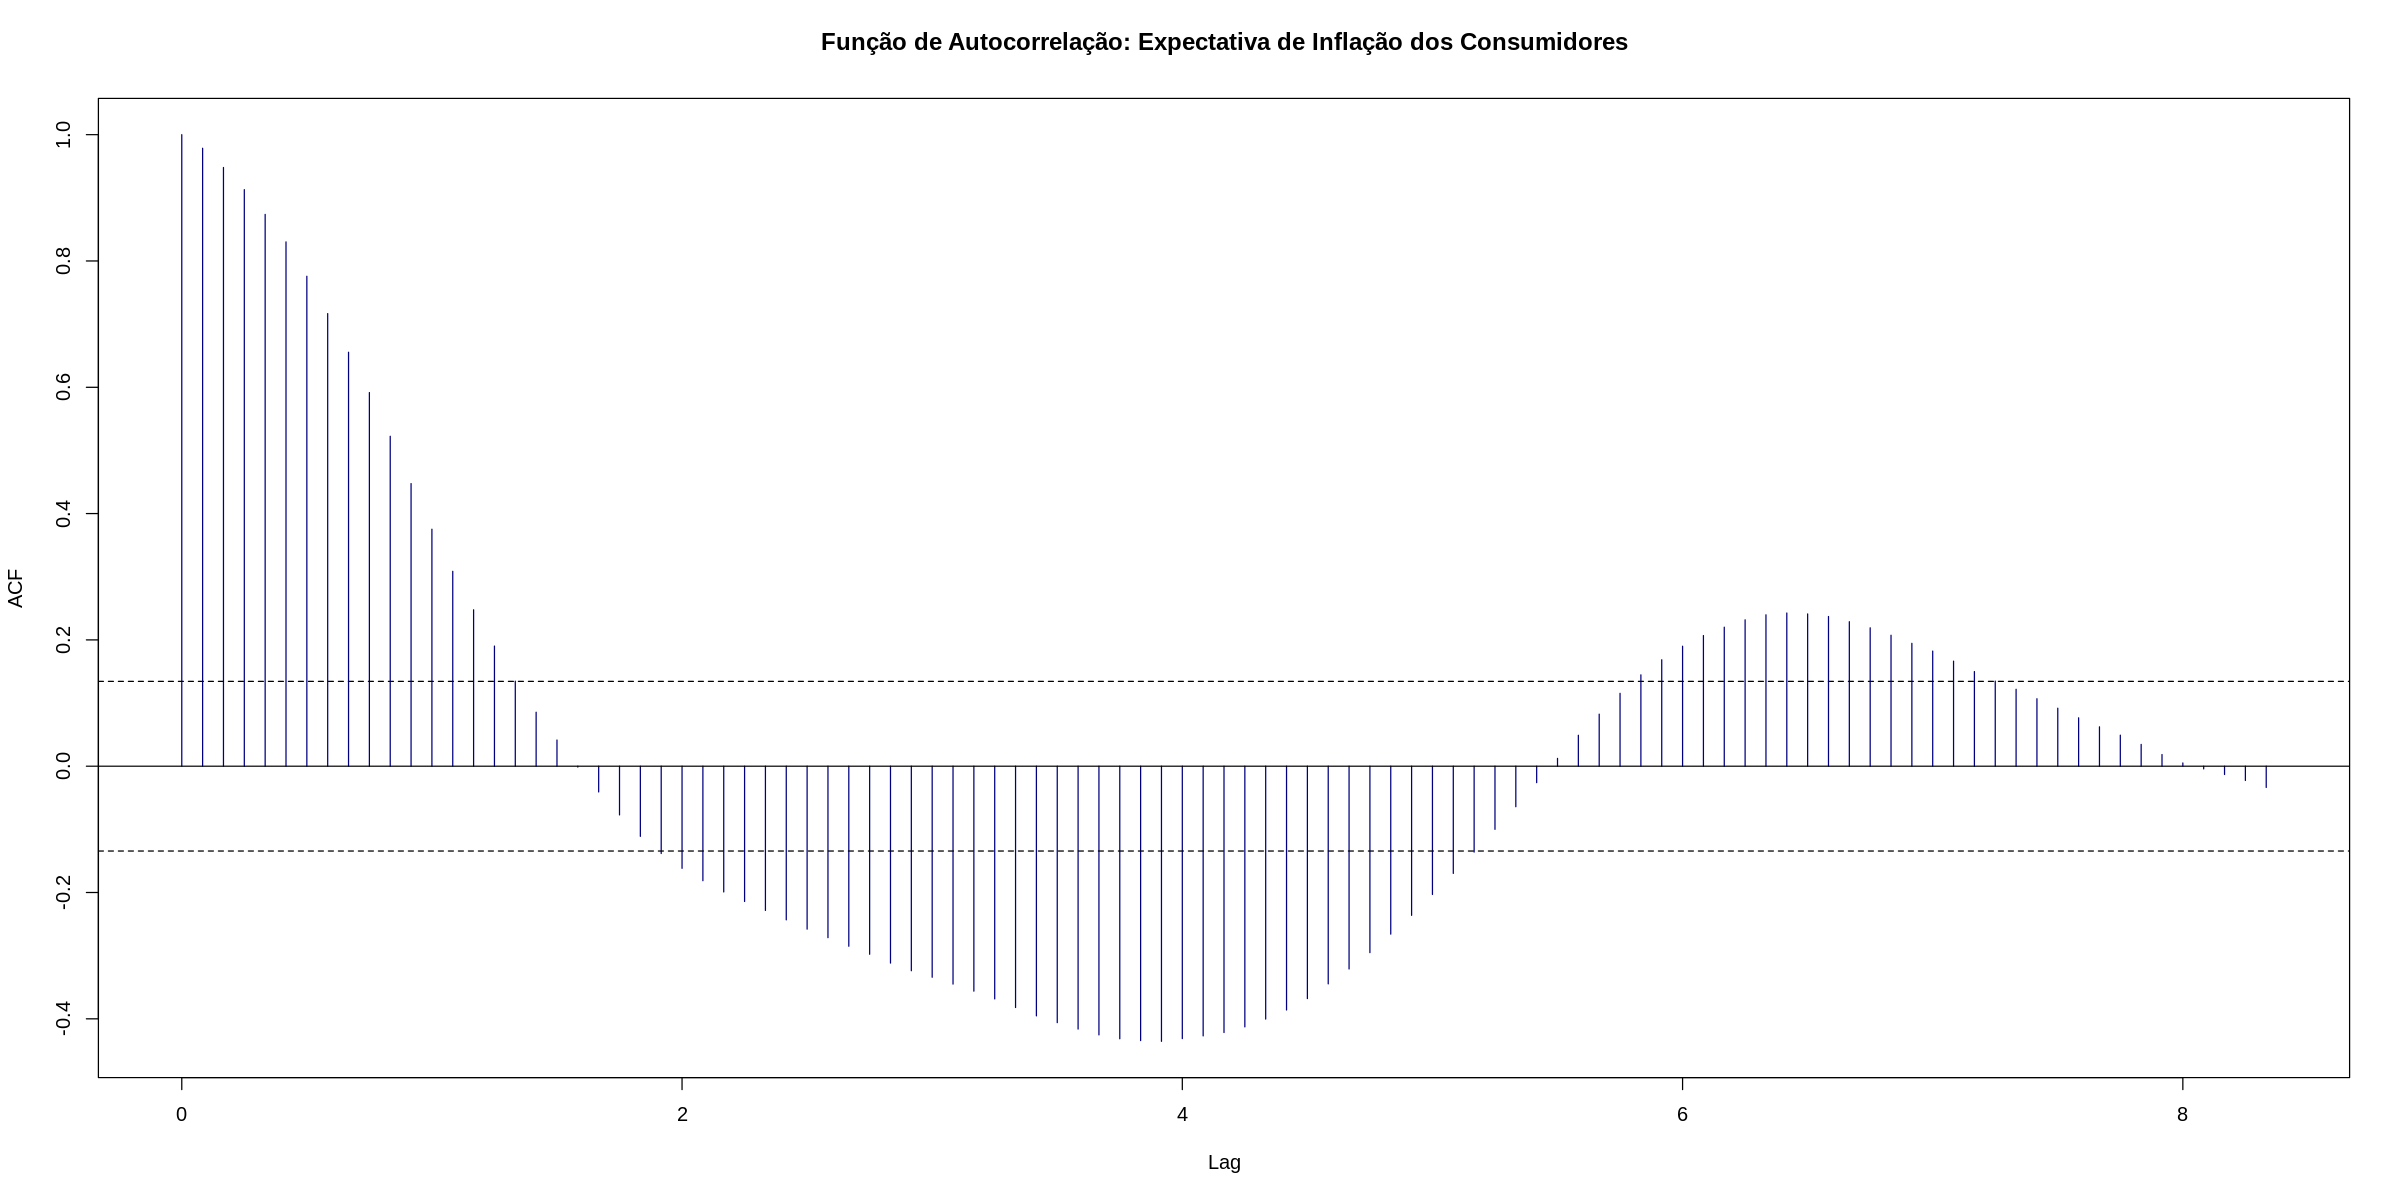

In [5]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação dos Consumidores",
    col = "navy",
    ci.col = "black",
    lag.max = 100)

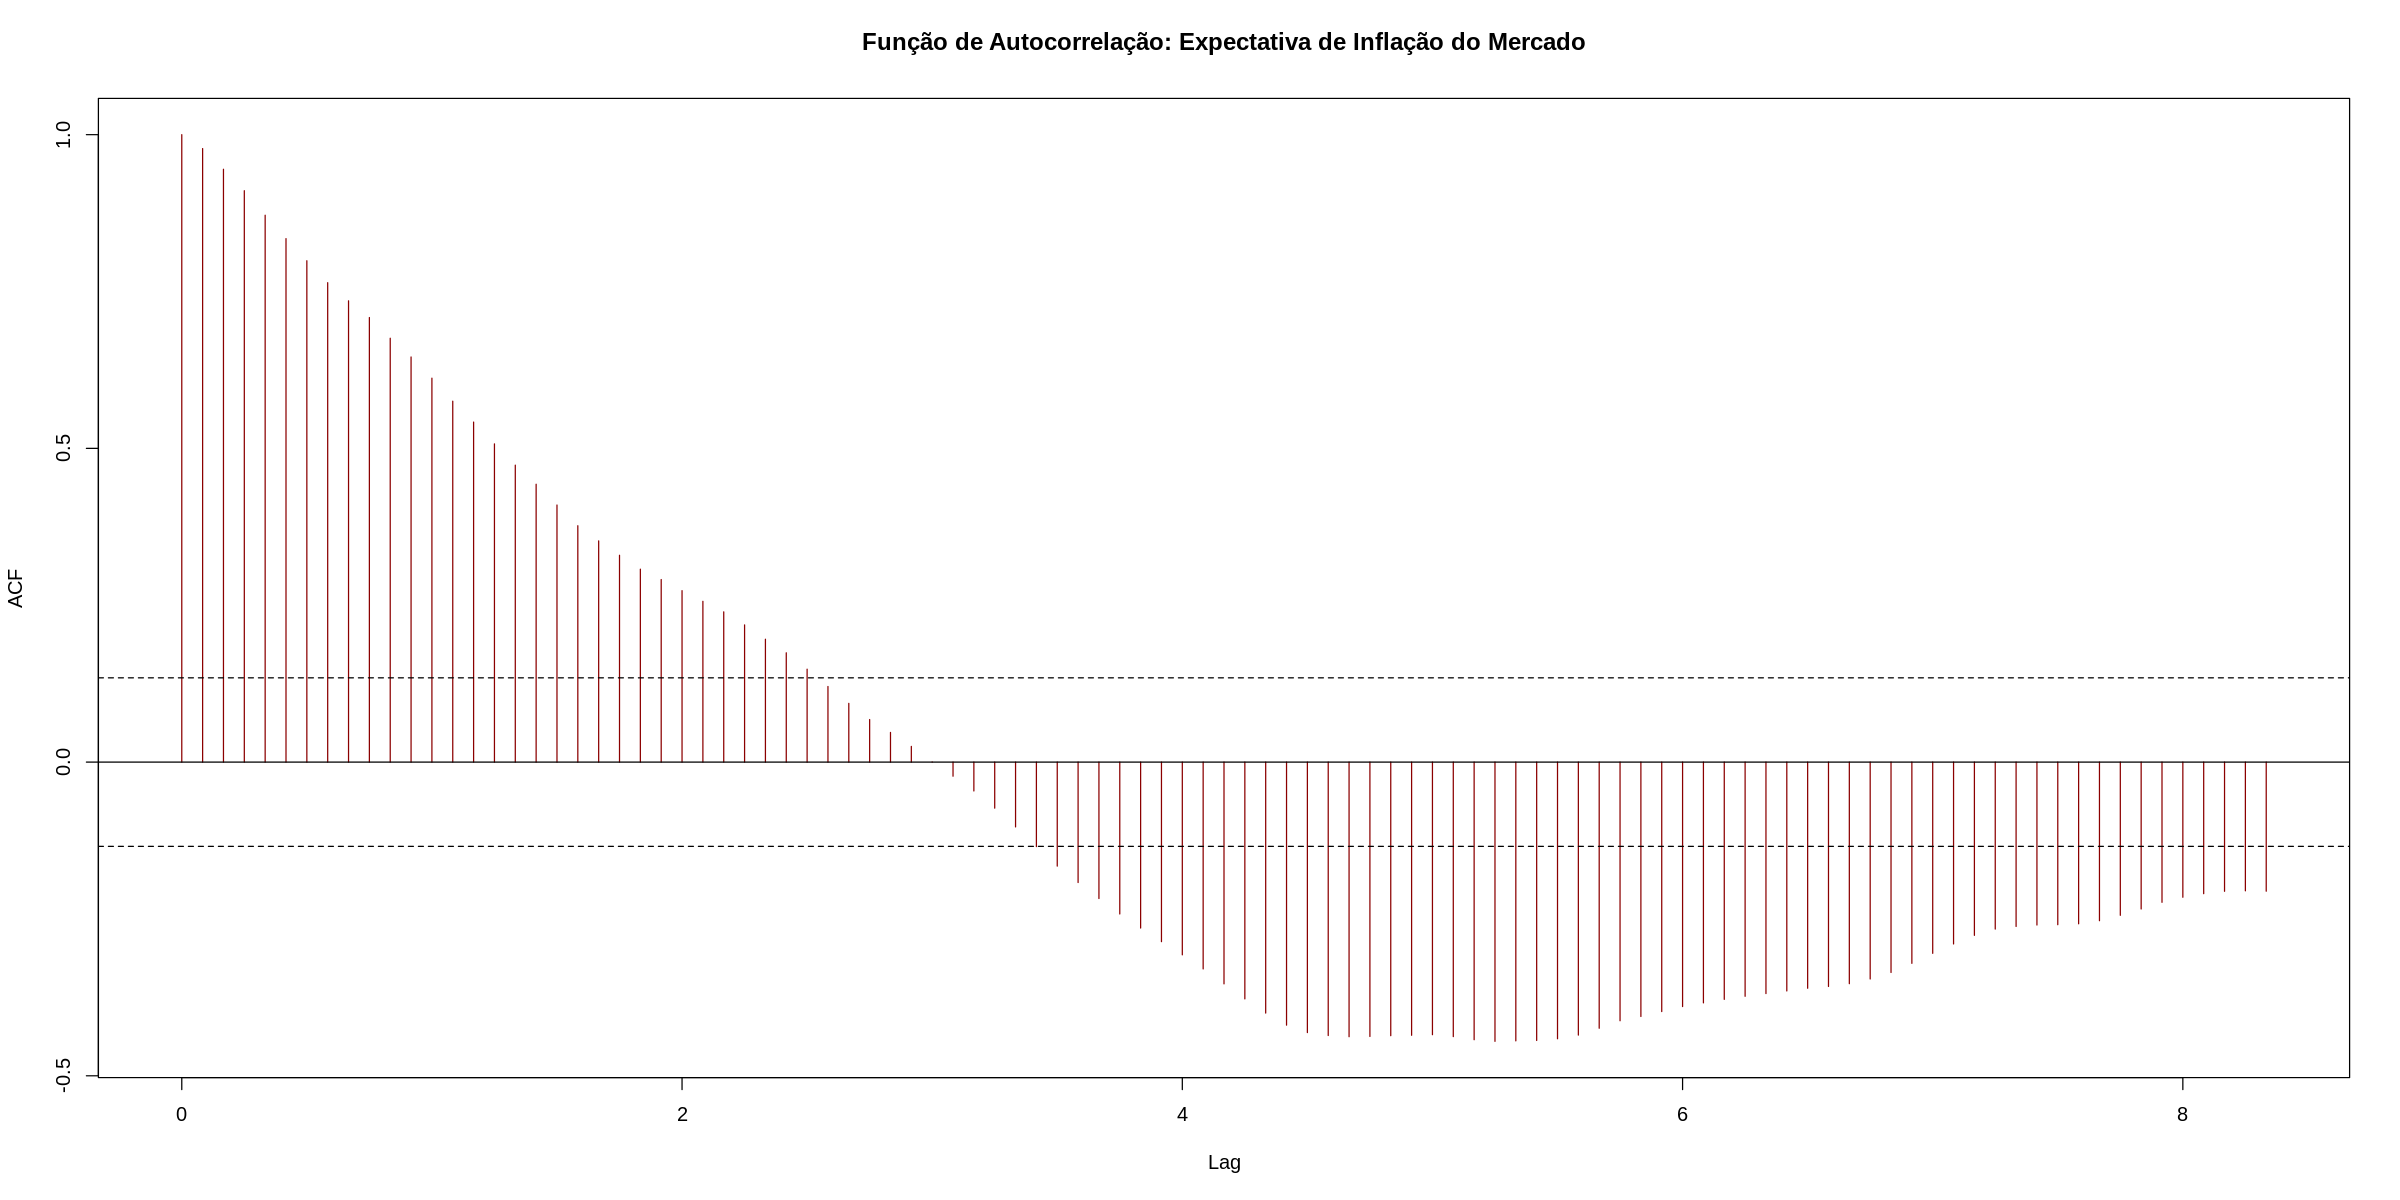

In [6]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação
acf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação: Expectativa de Inflação do Mercado",
    col = "darkred",
    ci.col = "black",
    lag.max = 100)

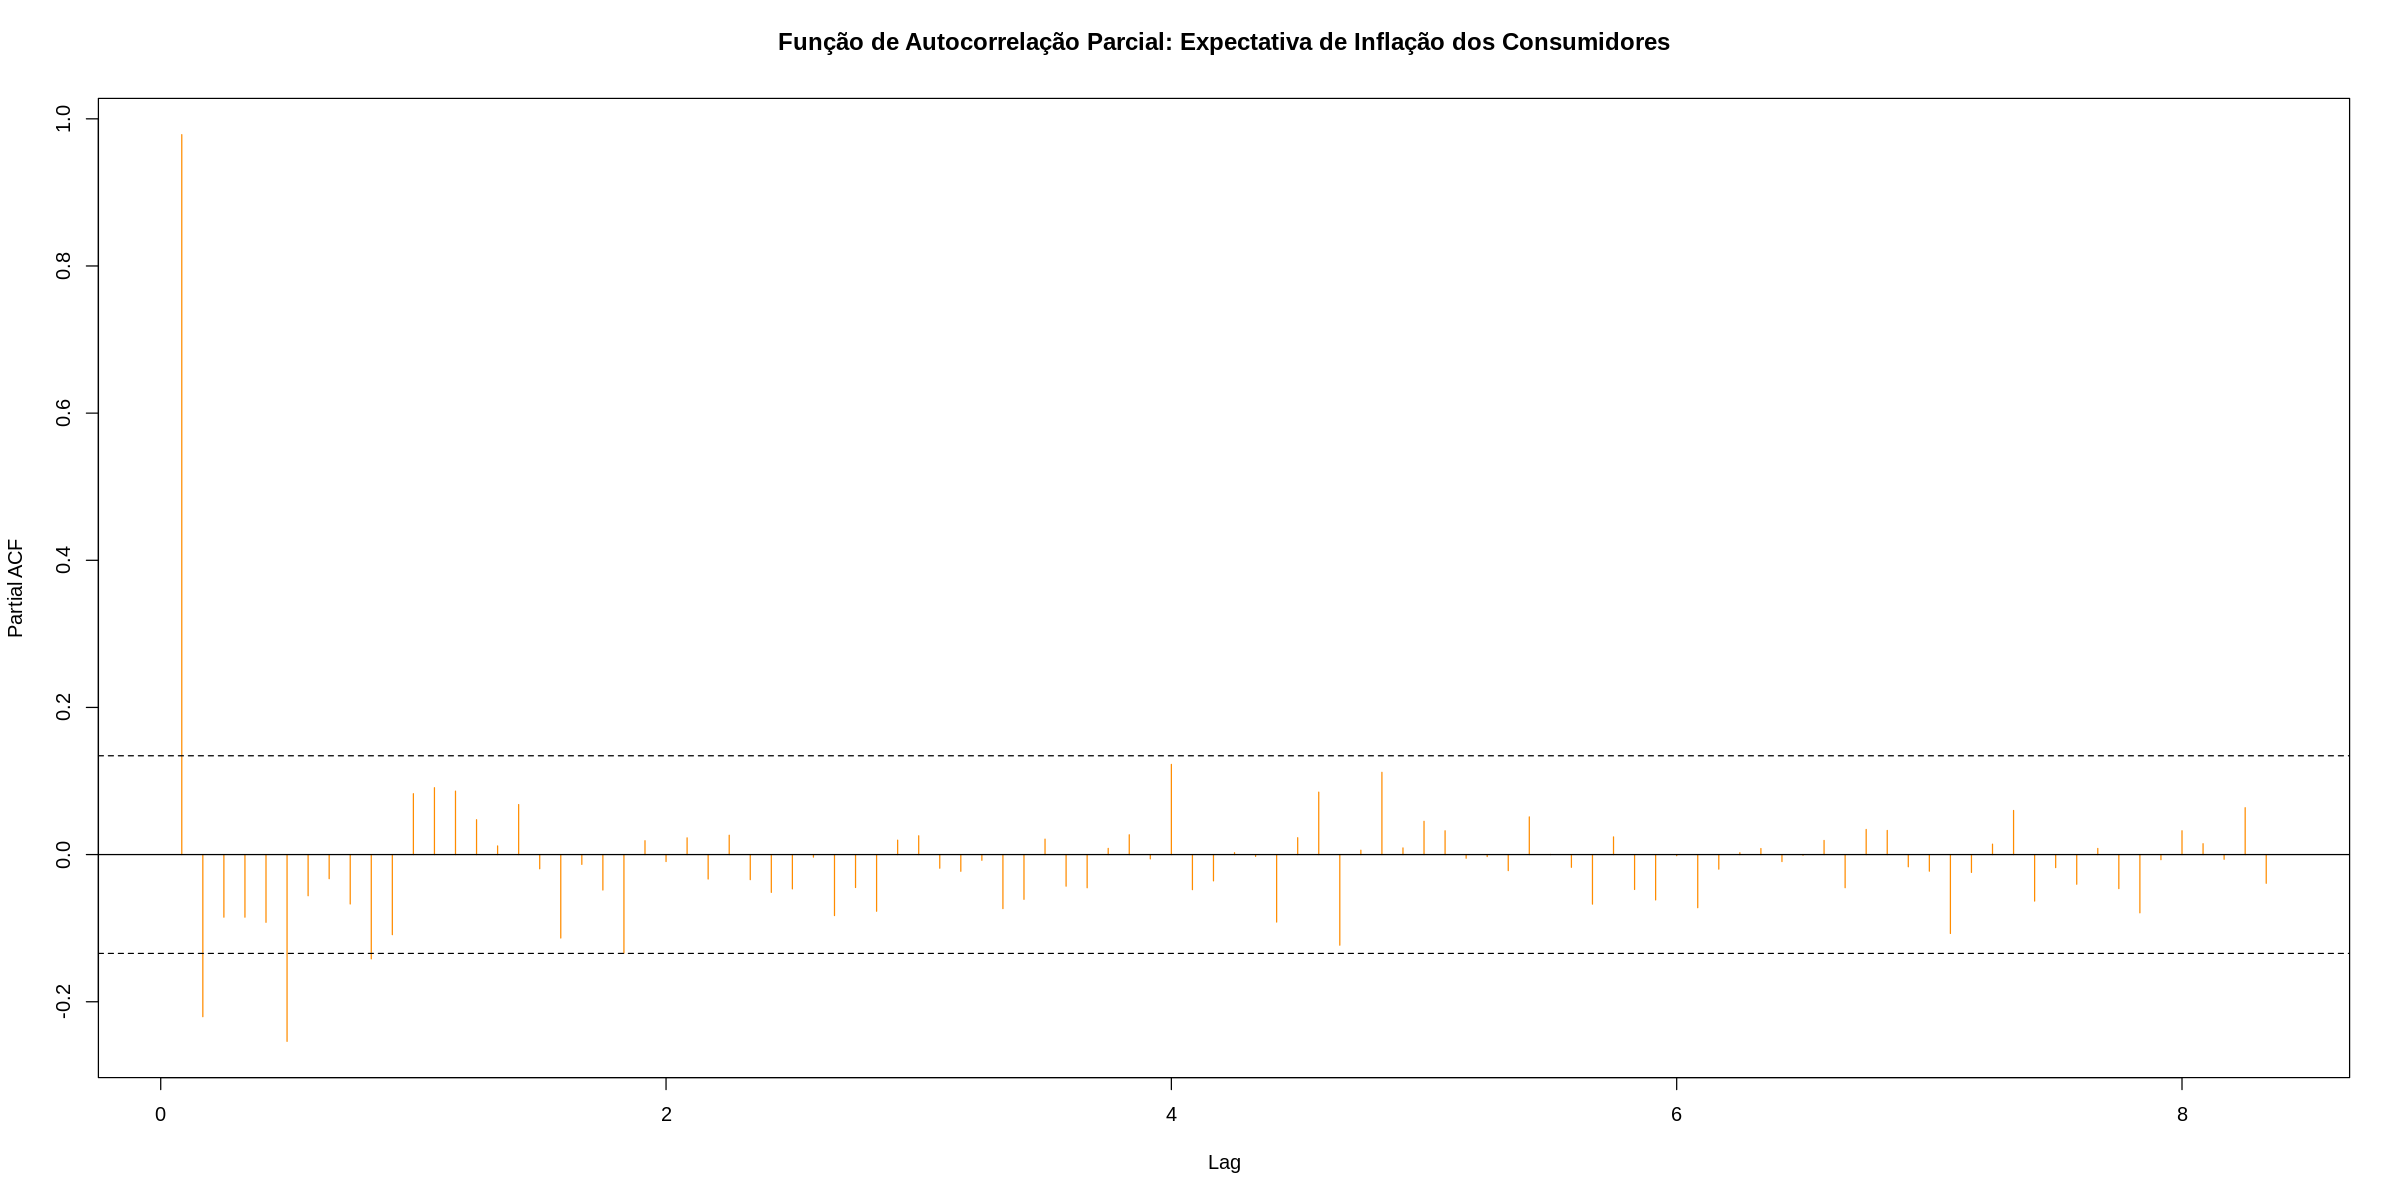

In [7]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$consumer_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação dos Consumidores",
    col = "darkorange",
    ci.col = "black",
    lag.max = 100)

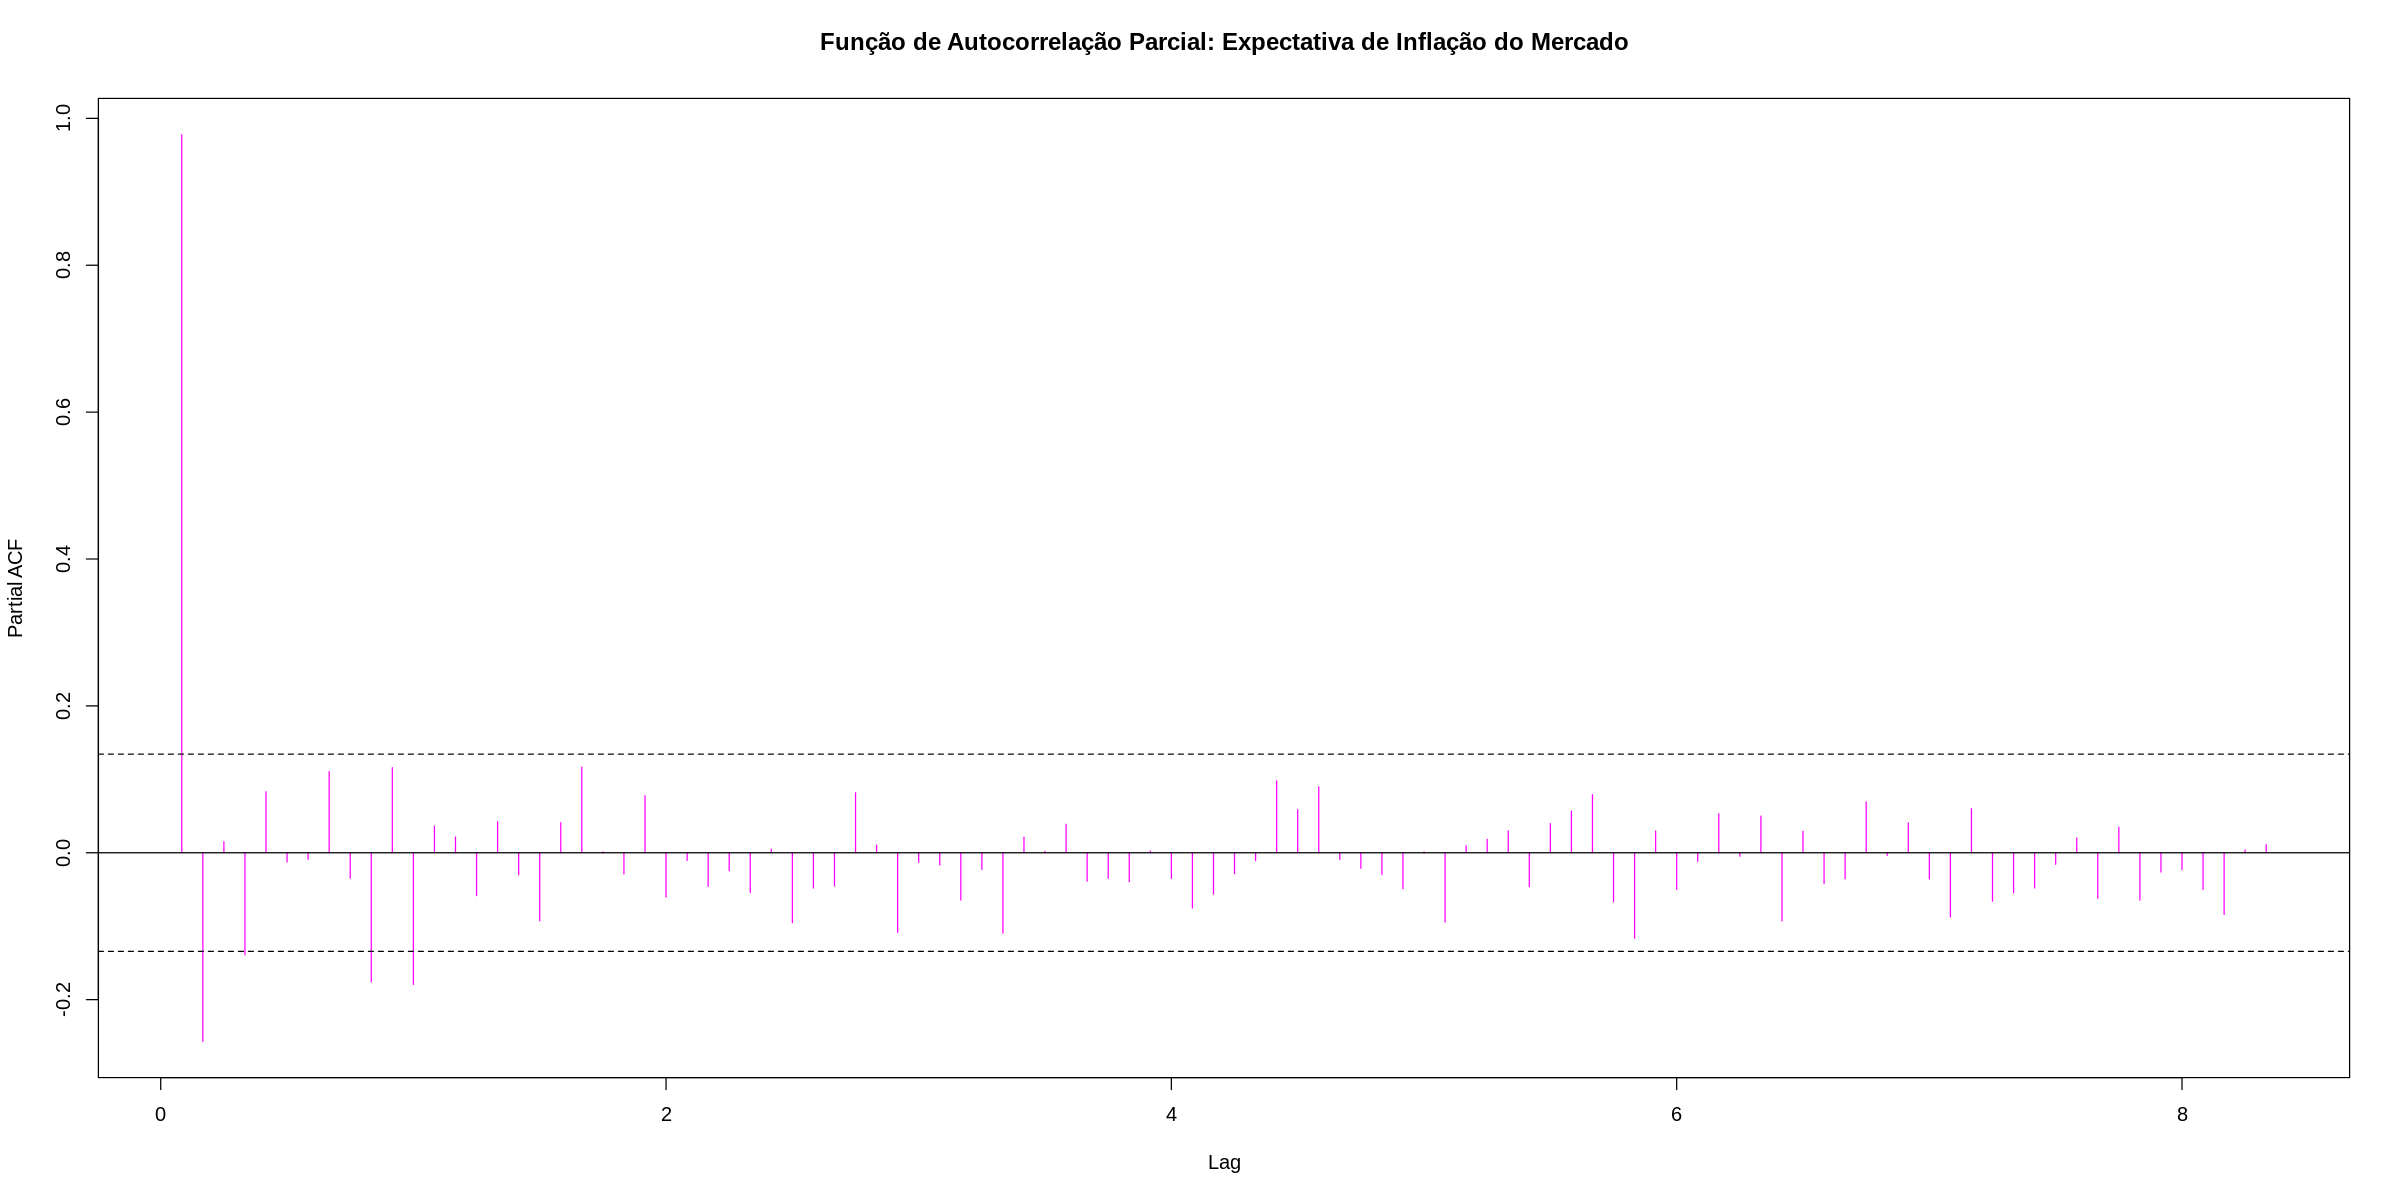

In [8]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Função de Autocorrelação Parcial
pacf(df_public_data$market_inflation_expectation,
    main = "Função de Autocorrelação Parcial: Expectativa de Inflação do Mercado",
    col = "magenta",
    ci.col = "black",
    lag.max = 100)

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [9]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data$consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09718 -0.18593 -0.00217  0.16516  0.94651 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.3465245  0.1217887   2.845 0.004937 ** 
z.lag.1      -0.0527800  0.0176060  -2.998 0.003093 ** 
tt            0.0002135  0.0003998   0.534 0.594029    
z.diff.lag1   0.1946259  0.0710048   2.741 0.006725 ** 
z.diff.lag2   0.0147418  0.0716132   0.206 0.837132    
z.diff.lag3   0.1022167  0.0713711   1.432 0.153778    
z.diff.lag4  -0.0220273  0.0712603  -0.309 0.757586    
z.diff.lag5   0.2401671  0.0712205   3.372 0.000908 ***
z.diff.lag6   0.0655601  0.0735778   0.891 0.374070    
z.diff.lag7   0.0356855  0.0728910   0.490 0.625015    
z.diff.lag8   0.0350632  0.07150

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

In [10]:
### Market Inflation Expectation
summary( ur.df( df_public_data$market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67941 -0.09598  0.00709  0.10356  0.48603 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1827491  0.0779888   2.343 0.020178 *  
z.lag.1      -0.0327961  0.0145377  -2.256 0.025245 *  
tt           -0.0002057  0.0002155  -0.955 0.341041    
z.diff.lag1   0.3728846  0.0723594   5.153 6.53e-07 ***
z.diff.lag2  -0.1165466  0.0753282  -1.547 0.123528    
z.diff.lag3   0.1737239  0.0735462   2.362 0.019210 *  
z.diff.lag4   0.0044159  0.0738168   0.060 0.952361    
z.diff.lag5  -0.0043001  0.0732623  -0.059 0.953258    
z.diff.lag6   0.0251018  0.0727703   0.345 0.730527    
z.diff.lag7  -0.0842385  0.0728878  -1.156 0.249282    
z.diff.lag8  -0.0918222  0.07356

**Resultado**

- Como, em módulo, os valores de test-statistic são **menores** que tau3, phi2 e phi3, **não se rejeita** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **possui raiz unitária**, o que significa que é **não-estacionária**.

#### KPSS

- $H_0$: não possui raiz unitária

In [11]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data$consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.2113 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é maior que o valor crítico, rejeita-se a hipótese nula para um nível de significância de 10%, ou seja, a série possui raiz unitária, o que significa que é não-estacionária.

In [12]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data$market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.5502 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **maior** que o valor crítico, **rejeita-se** a hipótese nula para um nível de significância de 10%, ou seja, a série **possui raiz unitária**, o que significa que é **não-estacionária**.

### **Induzir Estacionariedade**

In [13]:
diff_consumer_inflation_expectation = diff( df_public_data$consumer_inflation_expectation )
diff_market_inflation_expectation = diff( df_public_data$market_inflation_expectation )

df_public_data_diff <- data.frame( month = time( diff_consumer_inflation_expectation ), diff_consumer_inflation_expectation, diff_market_inflation_expectation)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


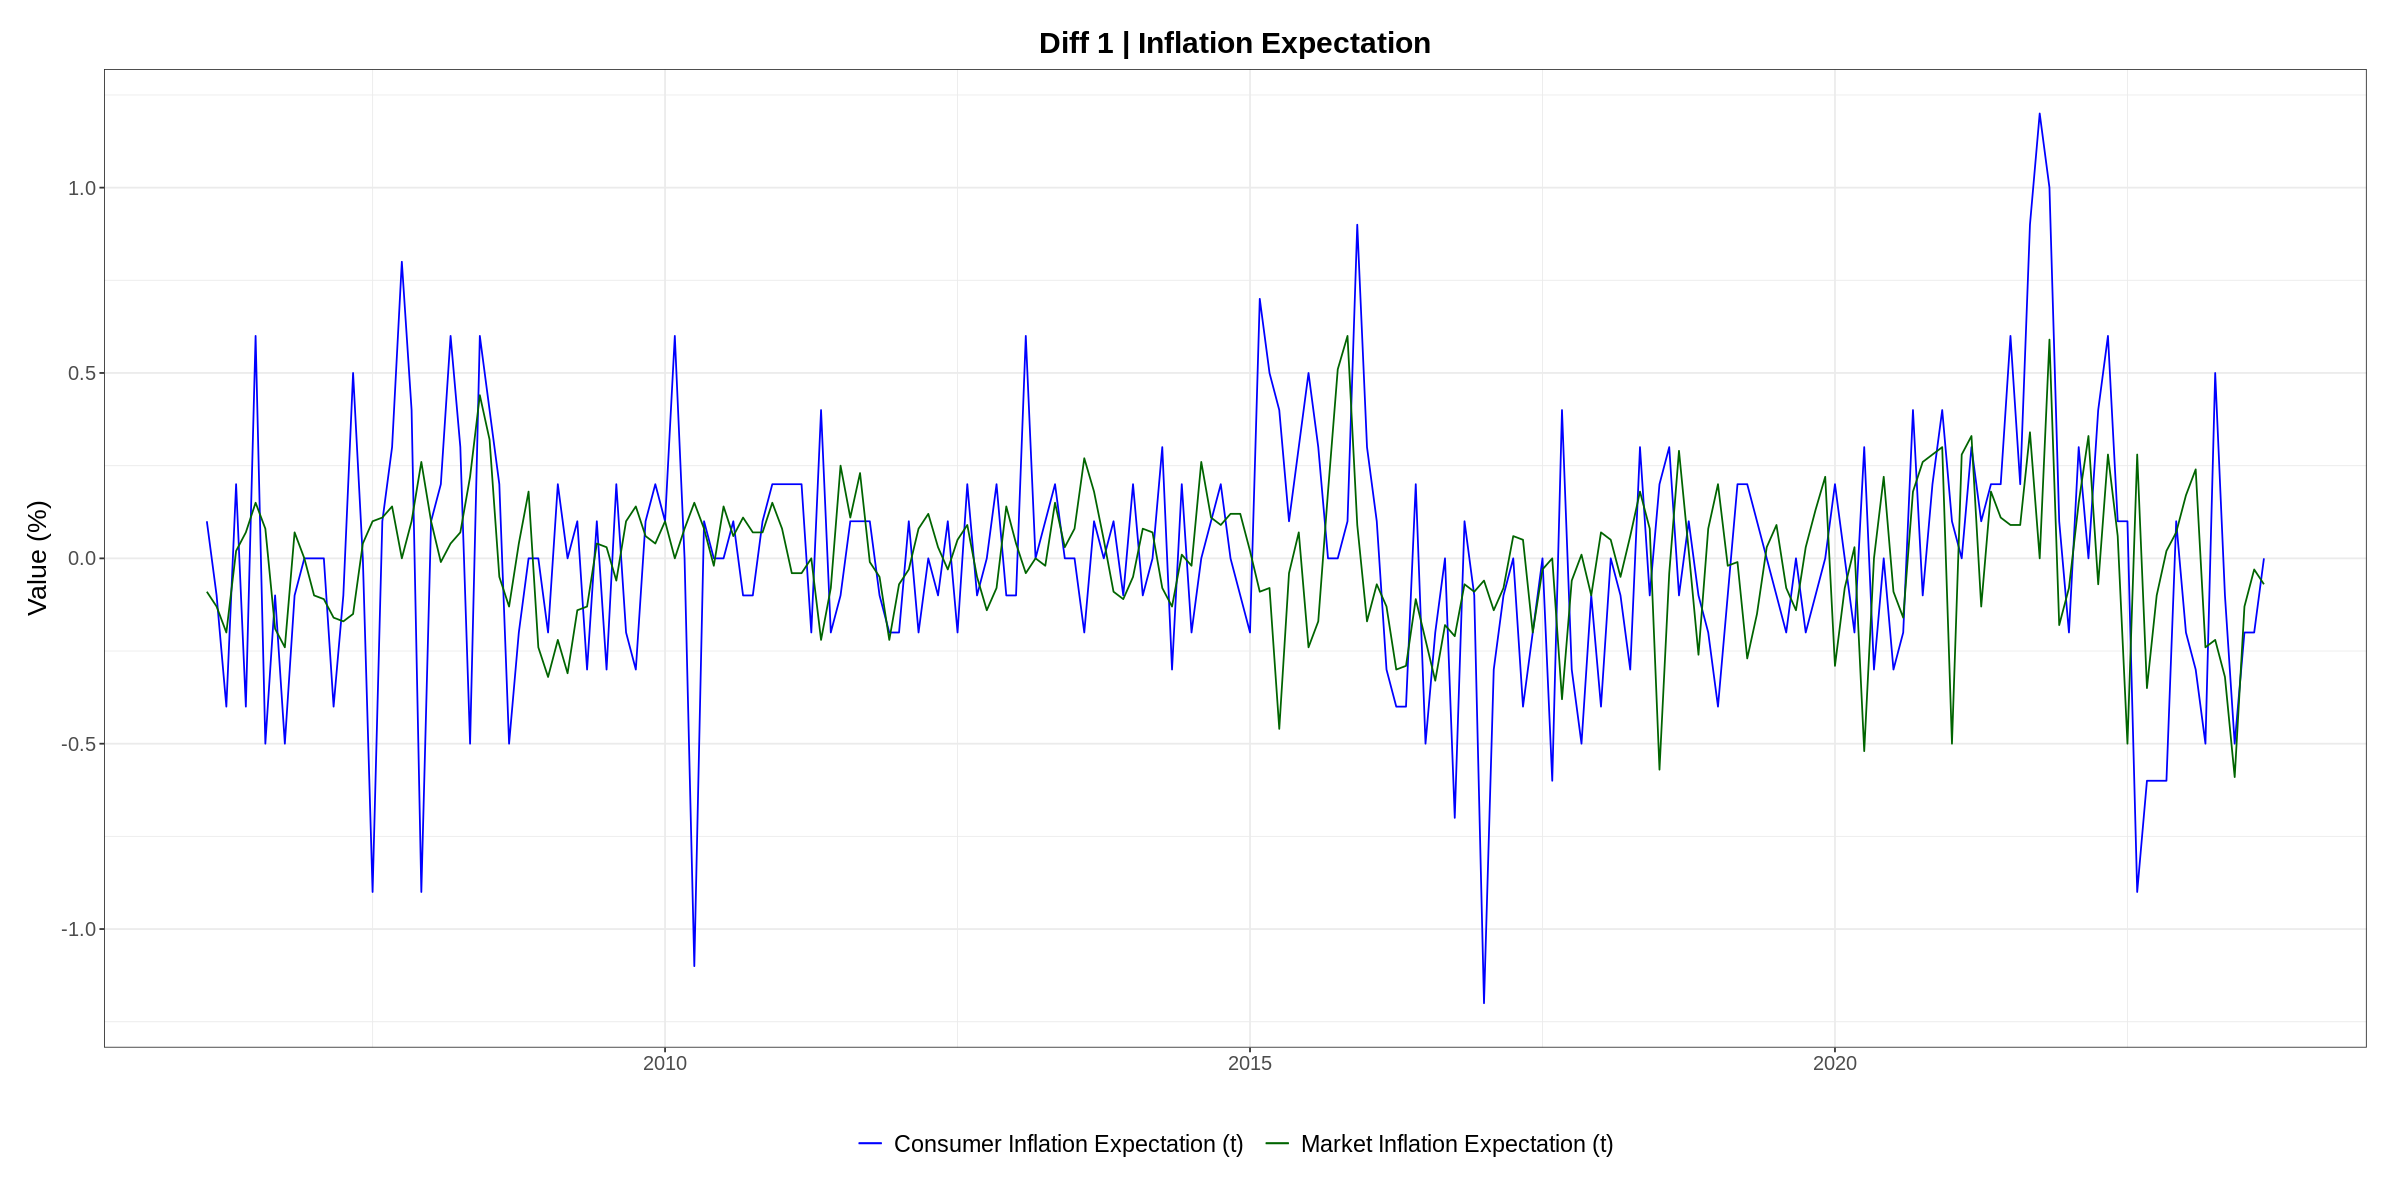

In [14]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 20, repr.plot.height = 10)

# Plotar as séries temporais de "consumer_inflation_expectation" e "market_inflation_expectation"
ggplot(df_public_data_diff) +
  geom_line(aes(x = month, y = diff_consumer_inflation_expectation, color = "Consumer Inflation Expectation (t)")) +
  geom_line(aes(x = month, y = diff_market_inflation_expectation, color = "Market Inflation Expectation (t)")) +
  labs(x = "", y = "Value (%)", title = "Diff 1 | Inflation Expectation") +
  scale_color_manual(values = c("blue", "darkgreen"), name = "") +
  theme_bw() +
  theme(
    legend.position = "bottom",
    legend.text = element_text(size = 14),
    legend.title = element_blank(),
    plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
    axis.text = element_text(size = 12),
    axis.title.y = element_text(size = 16, vjust = 2),
    axis.title.x = element_text(size = 14),
    plot.caption = element_text(size = 10),
    plot.margin = margin(20, 20, 20, 20)
  )

#### ADF (Augmented-Dickey-Fuller)

- $H_0$: possui raiz unitária

  * _tau3_: hipótese nula (raiz unitária)
  * _phi2_: hipótese nula (raiz unitária, sem tendência e sem drift)
  * _phi3_: hipótese nula (raiz unitária e sem tendência)

In [15]:
### Consumer Inflation Expectation
summary( ur.df( df_public_data_diff$diff_consumer_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1300 -0.1547 -0.0034  0.1774  0.9487 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.364e-03  5.011e-02   0.147  0.88332    
z.lag.1      -6.616e-01  1.562e-01  -4.236 3.59e-05 ***
tt           -3.229e-06  3.998e-04  -0.008  0.99356    
z.diff.lag1  -1.637e-01  1.533e-01  -1.068  0.28694    
z.diff.lag2  -1.691e-01  1.510e-01  -1.120  0.26421    
z.diff.lag3  -6.171e-02  1.508e-01  -0.409  0.68289    
z.diff.lag4  -8.791e-02  1.482e-01  -0.593  0.55372    
z.diff.lag5   1.357e-01  1.442e-01   0.941  0.34783    
z.diff.lag6   1.803e-01  1.415e-01   1.275  0.20403    
z.diff.lag7   1.948e-01  1.377e-01   1.415  0.15877    
z.diff.lag8   2.186e-01  1.323e-01   1.652

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3, phi2 e phi3, **rejeita-se** as hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**.

In [16]:
### Market Inflation Expectation
summary( ur.df( df_public_data_diff$diff_market_inflation_expectation, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67263 -0.09805  0.00377  0.10334  0.44861 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0201109  0.0275826   0.729 0.466858    
z.lag.1      -0.6761449  0.1921809  -3.518 0.000547 ***
tt           -0.0001692  0.0002193  -0.771 0.441477    
z.diff.lag1   0.0431065  0.1879745   0.229 0.818874    
z.diff.lag2  -0.0895745  0.1837716  -0.487 0.626539    
z.diff.lag3   0.0710930  0.1736452   0.409 0.682711    
z.diff.lag4   0.0525907  0.1670098   0.315 0.753198    
z.diff.lag5   0.0236168  0.1540043   0.153 0.878289    
z.diff.lag6   0.0318566  0.1437321   0.222 0.824841    
z.diff.lag7  -0.0655529  0.1357114  -0.483 0.629648    
z.diff.lag8  -0.1692833  0.12713

**Resultado**

- Como, em módulo, os valores de test-statistic são **maiores** que tau3 e phi3, mas não que phi2, **rejeita-se** 2 das 3 hipóteses nulas para um nível de significância de 10%, ou seja, a série temporal **não possui raiz unitária**, o que significa que é **estacionária**, mas a série é **não estacionária** após a segunda diferenciação.

#### KPSS

- $H_0$: não possui raiz unitária

In [17]:
### Consumer Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_consumer_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0685 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.

In [18]:
### Market Inflation Expectation
summary( ur.kpss( df_public_data_diff$diff_market_inflation_expectation, type = "tau",     # média diferente de zero
                              lags = "short"    # poucos lags
                              ) )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.063 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Resultado**

- Como, em módulo, o valor de test-statistic é **menor** que o valor crítico, **não se rejeita** a hipótese nula para um nível de significância de 10%, ou seja, a série **não possui raiz unitária**, o que significa que é **estacionária**.